In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceutical_data = pd.merge(mouse_data, trial_data, on = 'Mouse ID')

# Display the data table for preview
pymaceutical_data.head()

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = pymaceutical_data.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].mean().reset_index()

# Convert to DataFrame
df_tumor_mean = pd.DataFrame(tumor_mean)

# Preview DataFrame
df_tumor_mean.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325

Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051
12   Ceftamin         10           48.285125
13   Ceftamin         15           50.094055
14   Ceftamin         20           52.157049
15   Ceftamin         25           54.287674
16   Ceftamin         30           56.769517
17   Ceftamin         35           58.827548
18   Ceftamin         40           61.467895
19   Ceftamin         45           64.132421
20  Infubinol          0           45.000000
21  Infubinol          5           47.062001
22  Infubinol         10           49.403909
23  Infubinol         15           51.296397
24  Infubinol         20           53.197691
25  Infubinol         25           55.715252
26  Infubinol         30           58.299397
27  Infubinol         35           60.742461
28  Infubinol         40           63.162824
29  Infubinol         45           65.755562
..        ...        ...                 ...
70   Ramicane          0           45.000000
71   Ramicane          5           43.944859
72   Ramicane         10           42.531957
73   Ramicane         15           41.495061
74   Ramicane         20           40.238325
75   Ramicane         25           38.974300
76   Ramicane         30           38.703137
77   Ramicane         35           37.451996
78   Ramicane         40           36.574081
79   Ramicane         45           34.955595
80   Stelasyn          0           45.000000
81   Stelasyn          5           47.527452
82   Stelasyn         10           49.463844
83   Stelasyn         15           51.529409
84   Stelasyn         20           54.067395
85   Stelasyn         25           56.166123
86   Stelasyn         30           59.826738
87   Stelasyn         35           62.440699
88   Stelasyn         40           65.356386
89   Stelasyn         45           68.438310
90  Zoniferol          0           45.000000
91  Zoniferol          5           46.851818
92  Zoniferol         10           48.689881
93  Zoniferol         15           50.779059
94  Zoniferol         20           53.170334
95  Zoniferol         25           55.432935
96  Zoniferol         30           57.713531
97  Zoniferol         35           60.089372
98  Zoniferol         40           62.916692
99  Zoniferol         45           65.960888

[100 rows x 3 columns]

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = pymaceutical_data.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem().reset_index()

# Convert to DataFrame
df_tumor_se = pd.DataFrame(tumor_se)

# Preview DataFrame
df_tumor_se.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

In [6]:
# Minor Data Munging to Re-Format the Data Frames
df_munging=df_tumor_mean.pivot(index='Timepoint', columns = 'Drug',
                              values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
df_munging.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

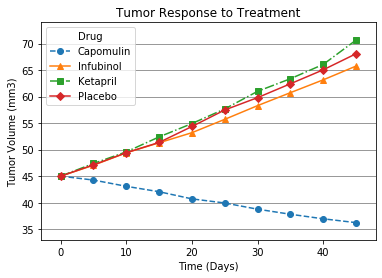

In [7]:
# Generate the Plot (with Error Bars)
df_tumor_response = df_munging[['Capomulin','Infubinol','Ketapril','Placebo']]
df_tumor_response.head()
tumor = df_tumor_response.plot(title='Tumor Response to Treatment', legend = True, 
                               style=['o--','^-',  's-.', 'D-'], figsize=(6,4), 
                               xlim=(-3, 48),ylim=(33,74))
tumor.yaxis.grid(color='gray')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites = pymaceutical_data.groupby(['Drug','Timepoint'])["Metastatic Sites"].mean().reset_index()

# Convert to DataFrame
df_metastatic_sites = pd.DataFrame(metastatic_sites)

# Preview DataFrame
df_metastatic_sites.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sites_se = pymaceutical_data.groupby(['Drug','Timepoint'])["Metastatic Sites"].sem().reset_index()

# Convert to DataFrame
df_metastatic_sites_se = pd.DataFrame(metastatic_sites_se)

# Preview DataFrame
df_metastatic_sites_se.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.074833
2  Capomulin         10          0.125433
3  Capomulin         15          0.132048
4  Capomulin         20          0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
df_munging_meta = df_metastatic_sites.pivot(index='Timepoint', columns = 'Drug',
                              values = 'Metastatic Sites')

# Preview that Reformatting worked
df_munging_meta.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

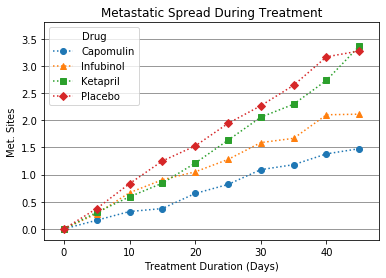

In [12]:

# Generate the Plot (with Error Bars)
df_metastatic_spread = df_munging_meta[['Capomulin','Infubinol','Ketapril','Placebo']]
df_metastatic_spread.head()
metastatic = df_metastatic_spread.plot(title='Metastatic Spread During Treatment', legend = True, 
                               style=['o:','^:','s:','D:'], figsize=(6,4),
                                      xlim=(-3, 48),ylim=(-0.2,3.8))
metastatic.yaxis.grid(color='gray')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = pymaceutical_data.groupby(['Drug','Timepoint'])["Mouse ID"].count().reset_index()

# Convert to DataFrame
df_mice = pd.DataFrame(mice_count)
df_mice_count = df_mice.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
df_mice_count.head()

Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23

Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
df_munging_mice = df_mice_count.pivot(index='Timepoint', columns = 'Drug',
                              values = 'Mouse Count')

# Preview the Data Frame
df_munging_mice.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

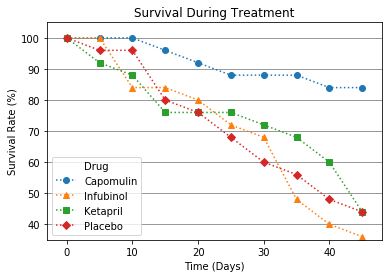

In [15]:
# Get percentage rate of mice per drug and timepoint
df_mice_count['Rate']= 100 - ((25-df_mice_count['Mouse Count'])/25*100)
df_mice_rate = df_mice_count[['Drug','Timepoint','Rate']]
df_munging_mice_rate = df_mice_rate.pivot(index='Timepoint', columns = 'Drug',
                              values = 'Rate')

# Generate the Plot (Accounting for percentages)
df_survival = df_munging_mice_rate[['Capomulin','Infubinol','Ketapril','Placebo']]

mice = df_survival.plot(title='Survival During Treatment', legend = True, 
                               style=['o:','^:','s:','D:'], figsize=(6,4),
                                      xlim=(-3, 48),ylim=(35,105))
mice.yaxis.grid(color='gray')
plt.xlabel('Time (Days)')
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("Survival During Treatment.png")

# Show the Figure

plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:

# Calculate the percent changes for each drug
drug_average = []
drug = []

for i in range(len(df_tumor_mean)):
    #if current drug record is not the same as previous drug record OR current drug record is NULL(for last record)
    if (df_tumor_mean.iloc[i,0] != df_tumor_mean.iloc[i-1,0]) or pd.isnull(df_tumor_mean.iloc[i,0]):
        drug_average.append((df_tumor_mean.iloc[i-1,2] - df_tumor_mean.iloc[i-1-(i-1),2])/ df_tumor_mean.iloc[i-1-(i-1),2]*100)
        drug.append(df_tumor_mean.iloc[i-1,0])

# Display the data to confirm
#combine list into dictionary
df_drug_changes = pd.DataFrame({'Drug':drug, 'Drug Average':drug_average})
df_drug_changes.sort_values('Drug')

Drug  Drug Average
1  Capomulin    -19.475303
2   Ceftamin     42.516492
3  Infubinol     46.123472
4   Ketapril     57.028795
5   Naftisol     53.923347
6    Placebo     51.297960
7   Propriva     47.241175
8   Ramicane    -22.320900
9   Stelasyn     52.085134
0  Zoniferol     46.579751

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

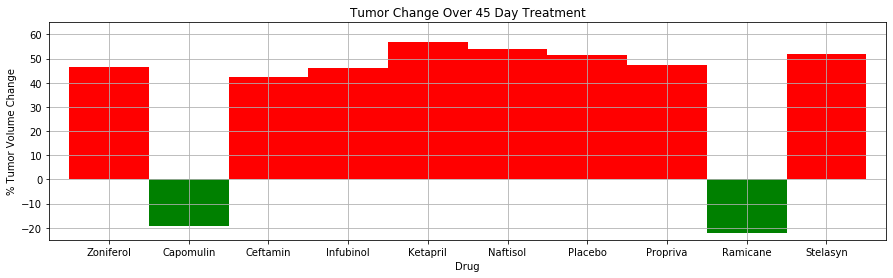

In [17]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = tuple(zip(drug,drug_average))
percent_tuple

tumor_change = df_drug_changes.plot(x='Drug',y='Drug Average', kind='bar',xlim=(-3, 48),
                                    ylim=(-25,65),grid='line',title='Tumor Change Over 45 Day Treatment',
                                    legend = False,figsize=(15,4),width = 1,
                                    color=(df_drug_changes['Drug Average'] > 0).map({True: 'r',False: 'g'}))


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc.
plt.ylabel("% Tumor Volume Change")
plt.xticks(rotation='horizontal')

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
#fig.show()0,

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
Conclusion:
Both Capomulin and Ramicane drugs are showing the most promising result. They both show higher survival rates from the tested mice and decreasing the size of the tumor. These two drugs should be tested further to figure out which will be the much superior drug.